In [1]:
import tensorflow as tf
from tensorflow.python.keras import models as m
from tensorflow.python.keras import layers as l

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import joblib
from sklearn.metrics import confusion_matrix, fbeta_score
from scikitplot.metrics import plot_roc, plot_confusion_matrix

import seaborn as sn
import pandas as pd

from ROOT import TFile, TTree, TChain
from ROOT import TH1F, TCanvas

import os
import sys
sys.path.insert(0, os.path.abspath('/home/arsahasransu/Documents/SoftDisplacedLeptons/Classifier/'))

print("All classes initialized successfully!!!")

Welcome to JupyROOT 6.18/04
All classes initialized successfully!!!


In [2]:
import plotBeautifier as pB

In [3]:
pB.trial_func("AR")

Trial works fine. Hello,AR


In [4]:
sigChan = TChain("varTree")
sigChan.Add("signal.root")
bkgChan = TChain("varTree")
bkgChan.Add("background.root")
print("Data read from the trees. Printing out the contents.")

Data read from the trees. Printing out the contents.


In [5]:
sigChan.Print()
bkgChan.Print()

******************************************************************************
*Chain   :varTree   : signal.root                                            *
******************************************************************************
******************************************************************************
*Tree    :varTree   : Input Variables List for Algorithms                    *
*Entries :    44440 : Total =         3213746 bytes  File  Size =    2732257 *
*        :          : Tree compression factor =   1.17                       *
******************************************************************************
*Br    0 :HtJet     : HtJet/D                                                *
*Entries :    44440 : Total  Size=     356973 bytes  File Size  =      24645 *
*Baskets :       12 : Basket Size=      32000 bytes  Compression=  14.46     *
*............................................................................*
*Br    1 :dRLL      : dRLL/D                        

In [6]:
# Load the input data scaler
scaler = joblib.load("../scaler.save")

# Load the model
loaded_model = m.load_model("../simplePer.h5")
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 18)                180       
_________________________________________________________________
dropout (Dropout)            (None, 18)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 18)                342       
_________________________________________________________________
dropout_1 (Dropout)          (None, 18)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 38        
Total params: 560
Trainable params: 560
Non-trainable params: 0
_________________________________________________________________


2020-03-12 14:38:00.240040: I tensorflow/core/platform/cpu_feature_guard.cc:143] Your CPU supports instructions that this TensorFlow binary was not compiled to use: SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA


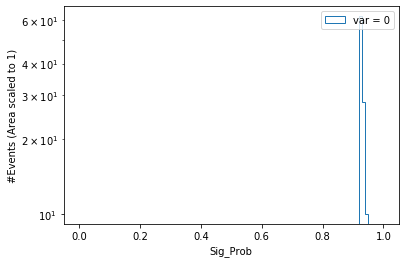

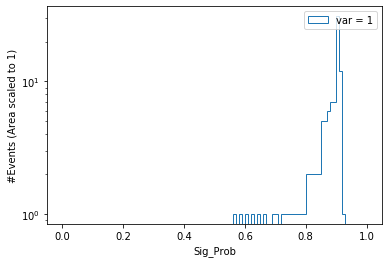

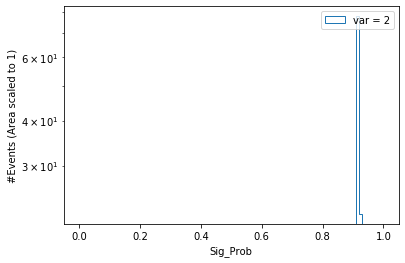

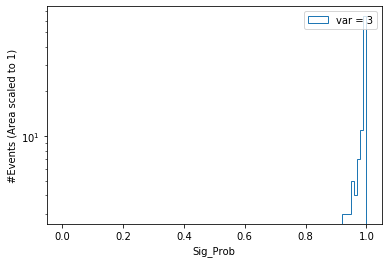

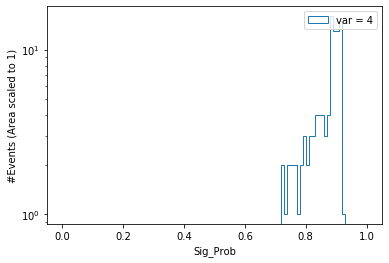

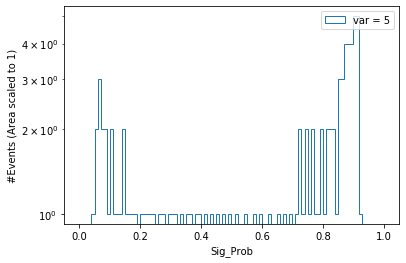

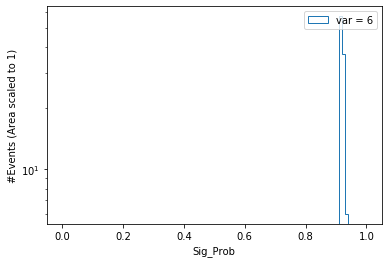

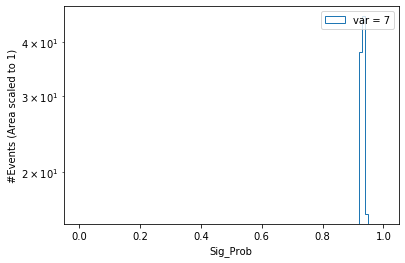

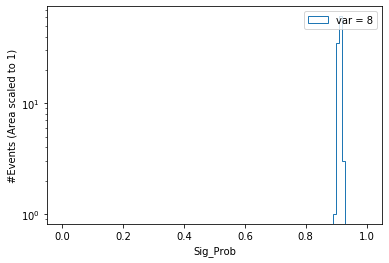

In [7]:
# Prepare variation in one variable and keep the other variables fixed at zero.

for i in np.arange(0,9,1):
    diff = 0.01
    nEvent = int(1.0/diff)
    x = np.concatenate((np.zeros(i*nEvent),np.arange(0,1,diff)))
    x = np.concatenate((x,np.zeros((8-i)*nEvent)))
    x = np.reshape(x, (9,nEvent))
    x = np.transpose(x)
    
    predict = loaded_model(x)
    
    plt.clf()
    plt.yscale('log')
    plt.hist(np.array(predict)[:,0], bins=100, range=(0,1), density=True, color=None, histtype='step', label=('var = '+str(i)))
    plt.xlabel("Sig_Prob")
    plt.ylabel("#Events (Area scaled to 1)")
    plt.legend()
    plt.show()
